In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", color_codes=True)
sns.set_palette('RdYlGn')

plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
import missingno
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [3]:
def distribution(df):
    """Fonction renvoie différents calcul coefficients de distribution ainsi 
    qu'un graphique de la distribution pour chaque variable quantitatives du dataframe d'entré
    
    Entrée : 
    - Dataframe
    
    Sortie :
    - Variance, Déviation standard
    - Coefficient d'asymétire et d'applatissement
    - Graphique de distribution
    """
    for column in df.select_dtypes(exclude='object'):
        print("-"*20)
        print(column)
        print("var:\n",data[column].var(ddof=0))
        print("std:\n",data[column].std(ddof=0))
        print("Skewness:\n",data[column].skew())
        print("kurtosis:\n",data[column].kurtosis())
        sns.distplot(a=df[column], kde=True, rug=True)
        plt.axvline(x=df[column].mean(), color='r', linestyle='--', linewidth=2, label='Mean')
        plt.axvline(x=df[column].median(), color='g', linestyle='-', linewidth=2, label='Median')
        plt.legend(loc='upper right')
        plt.show()       

def eta_squared(x,y):
    """Fonction de calcul eta carré en fonction de 
    SCT correspond à la variation totale 
    SCE correspond variation interclasse 
    
    Entrée : 
    x variable qualitative
    y variable quantitative
    
    Sortie : 
    - Résultat: rapport de corrélation ( variation interclasse / variation totale )
    """
    moyenne_y = y.mean()
    classes = []
    
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),'moyenne_classe': yi_classe.mean()})

    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    
    return SCE/SCT

# Ojectifs:


- **Quel problèmatique voulons nous résoudre ?:**

    - Analyser le dataset afin de determiner la faisabilité de notre application mobile


- **A quelles questions voulons nous répondre ?:**

    - La distribution des variables
    - Visualition et précision de la relations entre les variables nottament les targets (nutriscore)
    - Confirmer ou infirmer la corrélation entre la target et les différentes variables de calcul

In [4]:
data = pd.read_csv("./../dataset_nettoyer.csv", 
                   low_memory=False,  
                   encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75816 entries, 0 to 75815
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             75816 non-null  object 
 1   categories_tags          75816 non-null  object 
 2   labels_en                75816 non-null  object 
 3   countries_en             75816 non-null  object 
 4   additives_n              75816 non-null  float64
 5   nutriscore_score         75816 non-null  float64
 6   nutriscore_grade         75816 non-null  object 
 7   main_category_en         75816 non-null  object 
 8   energy-kcal_100g         75816 non-null  float64
 9   energy_100g              75816 non-null  float64
 10  fat_100g                 75816 non-null  float64
 11  saturated-fat_100g       75816 non-null  float64
 12  carbohydrates_100g       75816 non-null  float64
 13  sugars_100g              75816 non-null  float64
 14  fiber_100g            

# Analyses descriptives

## Distribution des variables

### Distribution des quantiles

In [11]:
data.describe()

,additives_n,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,salt_100g,nutrition-score-fr_100g
count,75816.000000,75816.000000,75816.000000,75816.000000,75816.000000,75816.000000,75816.000000,75816.000000,75816.000000,75816.000000,75816.000000
mean,1.270919,5.325353,97.745656,443.163479,3.318107,1.881799,16.374672,13.316015,0.469344,0.323595,5.325353
std,2.076043,7.613105,147.712468,632.551531,8.680475,5.311313,23.115415,19.935784,2.856895,3.199328,7.613105
min,0.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.417000,0.000000,-11.000000
25%,0.000000,0.000000,13.000000,96.000000,0.000000,0.000000,3.500000,1.700000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,44.035000,192.000000,0.000000,0.000000,8.900000,7.080000,0.000000,0.025000,1.000000
75%,2.000000,10.000000,68.000000,318.000000,1.500000,0.600000,13.000000,11.670000,0.000000,0.120000,10.000000
max,20.000000,40.000000,1962.000000,9040.000000,100.000000,100.000000,133.000000,122.000000,100.000000,227.250000,40.000000


### Distribution graphique

--------------------
additives_n
var:
 4.309899260836024
std:
 2.076029686886973
Skewness:
 1.945923330920528
kurtosis:
 3.7241716870677926


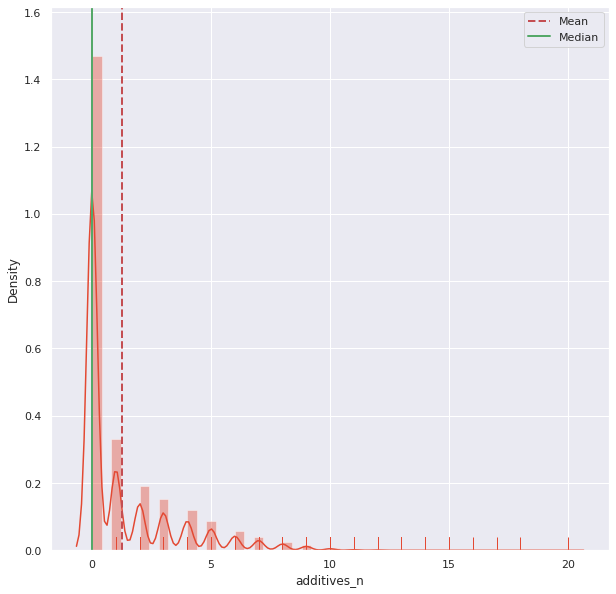

--------------------
nutriscore_score
var:
 57.95860379769315
std:
 7.613054826920213
Skewness:
 1.2317788905647742
kurtosis:
 0.5700000598138759


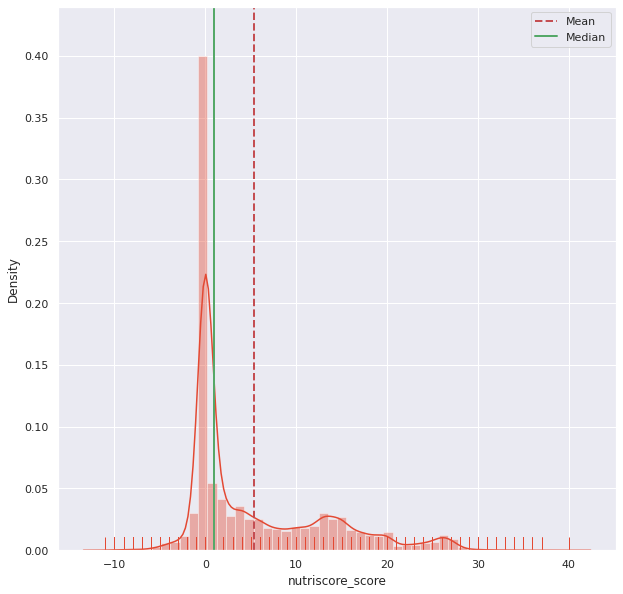

--------------------
energy-kcal_100g
var:
 21818.685283575003
std:
 147.7114934037802
Skewness:
 2.180514219229855
kurtosis:
 5.356739973159508


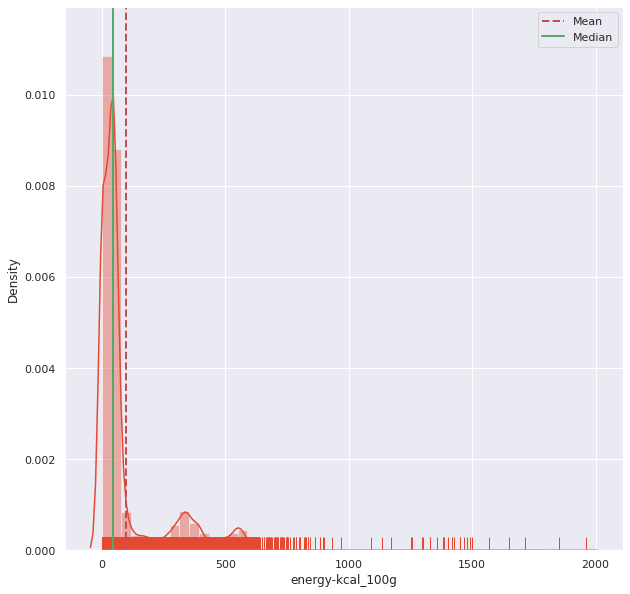

--------------------
energy_100g
var:
 400116.16175215406
std:
 632.5473592958507
Skewness:
 2.028626466833114
kurtosis:
 4.314595276130767


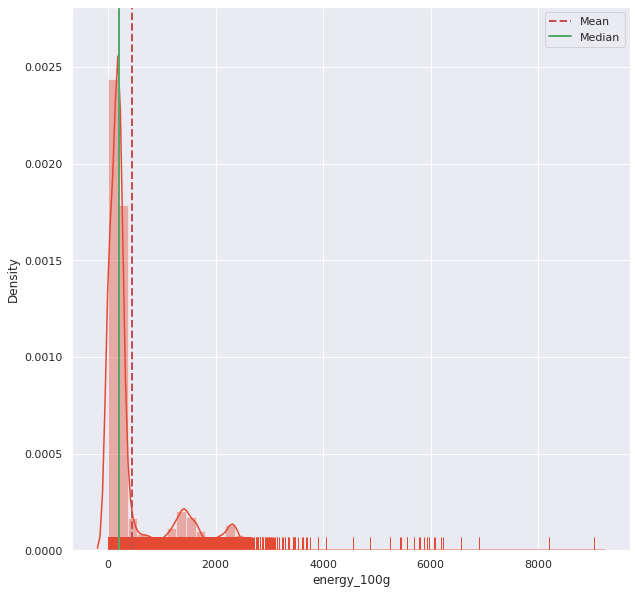

--------------------
fat_100g
var:
 75.34965373049666
std:
 8.680417831561835
Skewness:
 3.364670752014401
kurtosis:
 11.986468342654732


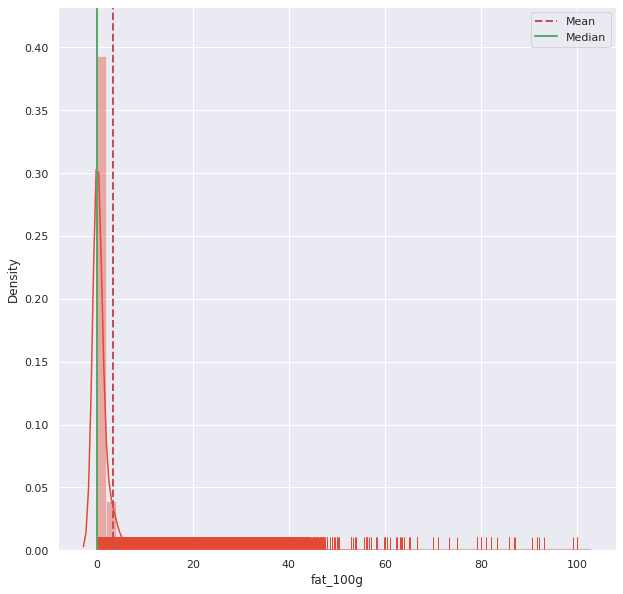

--------------------
saturated-fat_100g
var:
 28.20966853484118
std:
 5.311277486145982
Skewness:
 3.8118018324108753
kurtosis:
 20.43471093986362


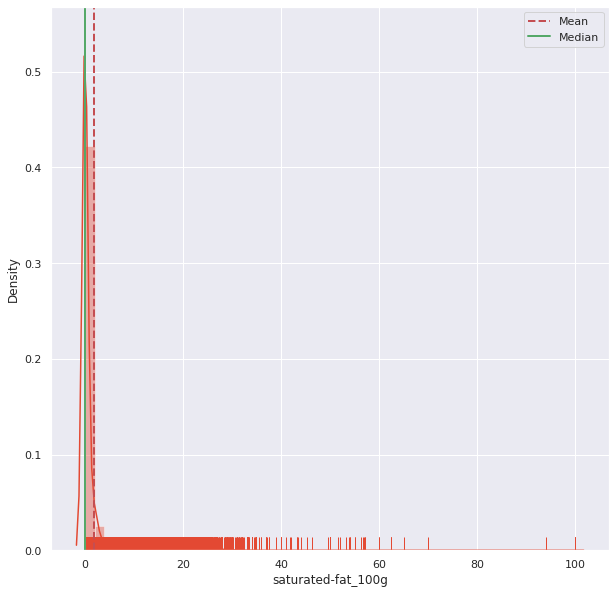

--------------------
carbohydrates_100g
var:
 534.3153728741653
std:
 23.115262768875574
Skewness:
 1.9863762697670413
kurtosis:
 2.797559480617467


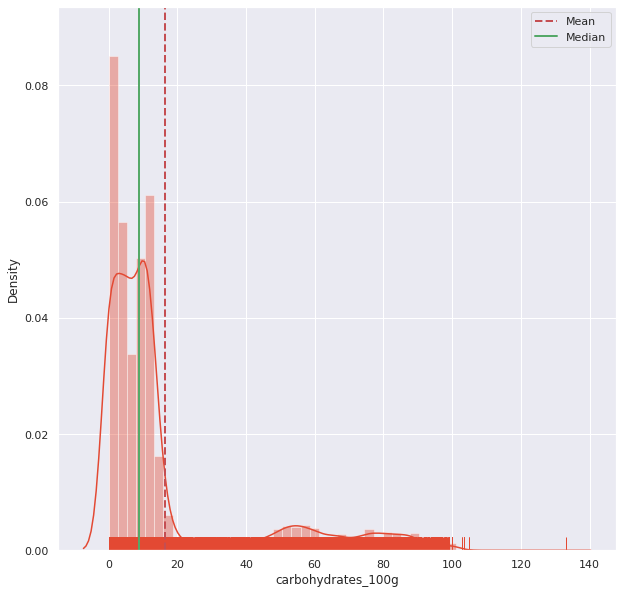

--------------------
sugars_100g
var:
 397.430239052411
std:
 19.935652461166427
Skewness:
 2.312599280284893
kurtosis:
 4.560931183502143


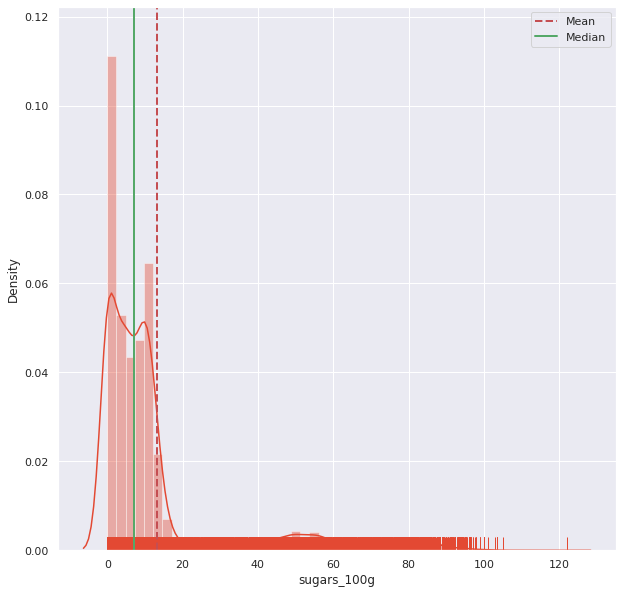

--------------------
fiber_100g
var:
 8.161742670594672
std:
 2.8568763834990607
Skewness:
 14.713786559250204
kurtosis:
 288.979580420906


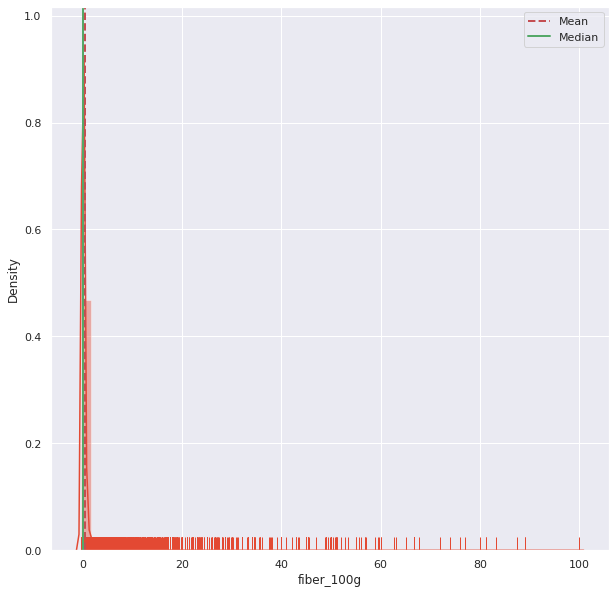

--------------------
salt_100g
var:
 10.235567829090936
std:
 3.199307398342794
Skewness:
 34.517582797366025
kurtosis:
 1584.2624014222554


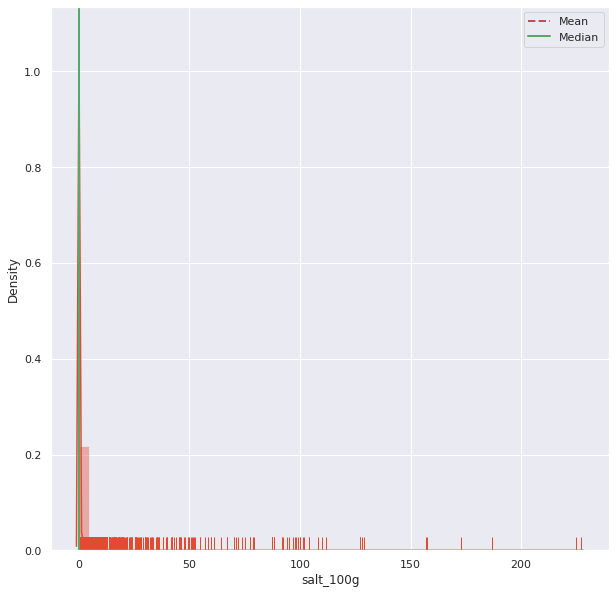

--------------------
nutrition-score-fr_100g
var:
 57.95860379769315
std:
 7.613054826920213
Skewness:
 1.2317788905647742
kurtosis:
 0.5700000598138759


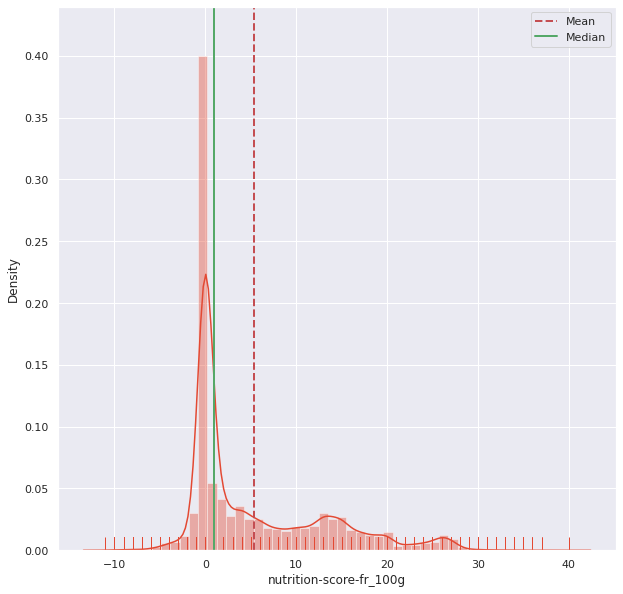

In [100]:
distribution(data)

### Conclusion 

**Rappel**: l'imputation des valeurs manquantes a introduit un biais dans nos variables, et donc leur distribution.

**Analyse**:
L'analyse de la distribution nous indique qu'aucune de nos variables ne suit la loi normale (On sait que le coefficient d'asymétrie vaut zéro pour toute loi normale, tandis que le coefficient d'aplatissement vaut 3 (0 si normalisé)). 
Cependant, le nombre d'individus de notre échantillon étant grand (75816), on considère que nos distributions tendent vers la loi normale (loi des grands nombres).

# Anayses Univariées
**Les analyses univariées permettent de préciser la relation entre deux variables**

## Relation "nutriscore"

### Nutriscore quali/quanti
La première relation que nous souhaitons analyser **nutriscore_grade** - **nutriscore_score**:
- Une variable est numérique et l’autre qualitative nous utiliserons l'Anova (analyse de variance)

H0: Egalité des moyennes des **nutriscore_grade** en fonction du **nutriscore_score**

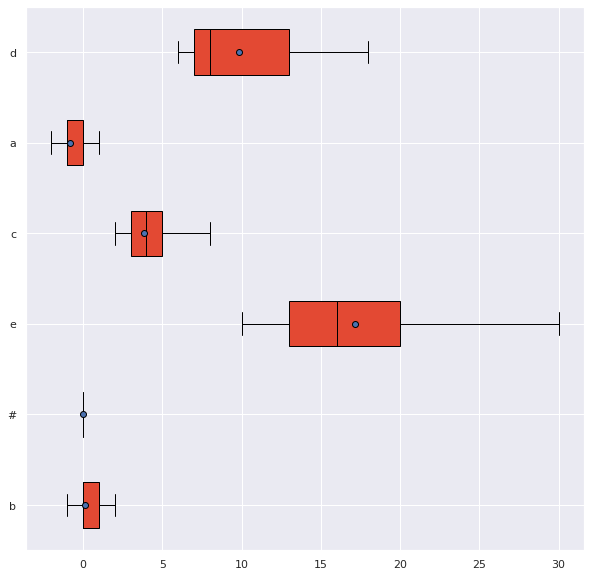

In [102]:
X = "nutriscore_grade" # qualitative
Y = "nutriscore_score" # quantitative

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'b'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

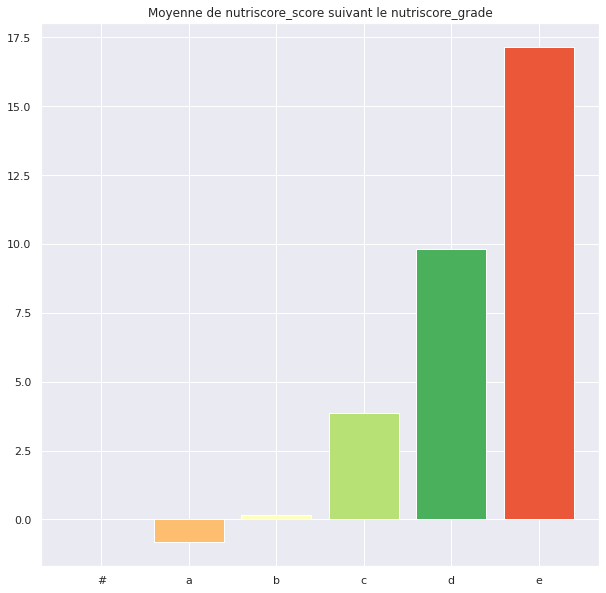

In [16]:
nutri_grade = data.loc[:,['nutriscore_grade', 'nutriscore_score']].groupby('nutriscore_grade').agg(['mean', 'count'])

plt.title('Moyenne de nutriscore_score suivant le nutriscore_grade')
plt.bar(nutri_grade.index, nutri_grade['nutriscore_score']['mean'], color= sns.color_palette("RdYlGn", 5))
plt.show()

Graphiquement nous distinguons nos différentes classes: a, b, c, d et e.
Chacune de nos classes ont une moyenne différentes et des valeurs différentes.

In [13]:
eta_squared(data[X],data[Y])

0.8489964042212593

#### Conclusion 

Eta carré de nos variables X et Y étant proche de 0.85 cela signifie que les moyennes par classes sont très différentes. 

**Nous pouvons rejeter l'hypothése H0 : il existe donc a priori une relation entre les variables Y et X (nutriscore_grade - nutriscore_score).**

### Visualisation du nuage de points nutriscore

In [4]:
df_nutri = data[(data["nutriscore_grade"].str.contains("#")==False)]

Text(0.5, 1.0, 'Relation entre les différents nutriscores disponible dans notre dataset')

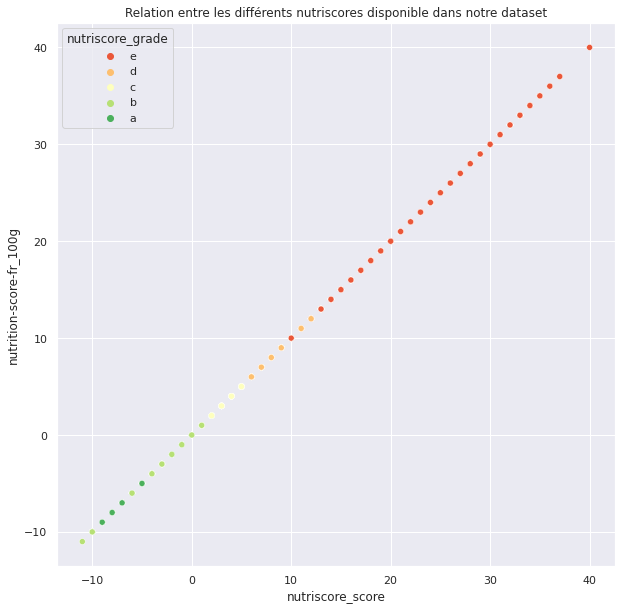

In [93]:
sns.scatterplot(x=df_nutri['nutriscore_score'], 
                y=df_nutri['nutrition-score-fr_100g'], 
                hue=df_nutri['nutriscore_grade'],
                hue_order=['e','d','c','b','a'],
                legend='full',
                palette=sns.color_palette("RdYlGn", 5)) 
plt.title('Relation entre les différents nutriscores disponible dans notre dataset')

#### Conclusion 

Nous pouvons voir graphiquement que le nutriscore et le nutriscore fr suivent une courbe linéaire ils sont donc bien corrélé.

Il en va de même pour le nutriscore_grade qui qu'en à lui voit sa couleur changé en fonction des valeur des 2 autres nutriscore.

## Relation nutriscore-label

### Les Labels eco/bio tendent vers un meilleur nutriscore ?

In [5]:
df_label_ecobio = data[(data["labels_en"].str.contains("bio|eco")==True) & (data["nutriscore_grade"].str.contains("#")==False)]
df_label_ecobio

,product_name,categories_tags,labels_en,countries_en,additives_n,nutriscore_score,nutriscore_grade,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,salt_100g,nutrition-score-fr_100g
1328,Leche de coco en polvo liofilizada,"en:plant-based-foods-and-beverages,en:beverage...","Organic,Vegetarian,EU Organic,No gluten,Vegan,...",Spain,0.0,21.0,e,milks,650.0,2720.0,50.0,50.0,30.0,10.0,0.0,0.3000,21.0
2906,Chocolate Football Game,"en:snacks,en:sweet-snacks,en:confectioneries,e...","Not advised for specific people,Not recommende...",France,1.0,26.0,e,milks,563.0,2356.0,32.6,20.0,58.8,58.8,1.6,0.2000,26.0
3423,Gelée D'Aloe Vera - 473 ML - Lily of the Desert,"en:plant-based-foods-and-beverages,en:beverage...","Not advised for specific people,Not advised fo...",France,4.0,1.0,b,Unsweetened beverages,6.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0424,1.0
18005,Bio Ingwer Kurkuma Shot,"en:plant-based-foods-and-beverages,en:beverage...",100-direktsaft-bio,Germany,0.0,-1.0,b,juices,32.0,136.0,0.5,0.1,5.8,5.7,0.0,0.0100,-1.0
18261,Pomegranate Green Tea,"en:plant-based-foods-and-beverages,en:beverage...","Made in Germany,fr:eco-emballages","Austria,Belgium,France,Switzerland",2.0,7.0,d,Sweetened beverages,21.0,88.0,0.0,0.0,5.0,4.9,0.0,0.0000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72080,Lait Chocolaté,"en:beverages,en:dairies,en:dairy-drinks,en:fla...","Green Dot,Made in France,fr:eco-emballages",France,1.0,0.0,b,Sweetened beverages,0.0,309.0,1.0,0.7,12.5,12.5,0.0,0.1270,0.0
72995,Pure Leaf Thé Noir Bio Earl Grey 15 Sachets,"fr:rainforest-alliance,fr:the-noir-bio","Organic,Non-EU Agriculture,Green Dot,PEFC,Rain...",France,0.0,0.0,b,teas,4.0,17.0,0.0,0.0,0.5,0.5,0.0,0.0000,0.0
74290,Aloe Vera Lemon,"en:plant-based-foods-and-beverages,en:beverage...","Organic,Green Dot,fr:th-bio-04",France,1.0,6.0,d,Unsweetened beverages,28.0,117.0,0.0,0.0,6.6,2.5,0.2,0.0000,6.0
74778,Bio-Milch,"en:dairies,en:milks","Organic,EU Organic,AT-BIO-902,de:ama-bio-siegel",Austria,0.0,2.0,b,milks,68.0,285.0,4.0,2.7,4.8,4.8,0.0,0.1300,2.0


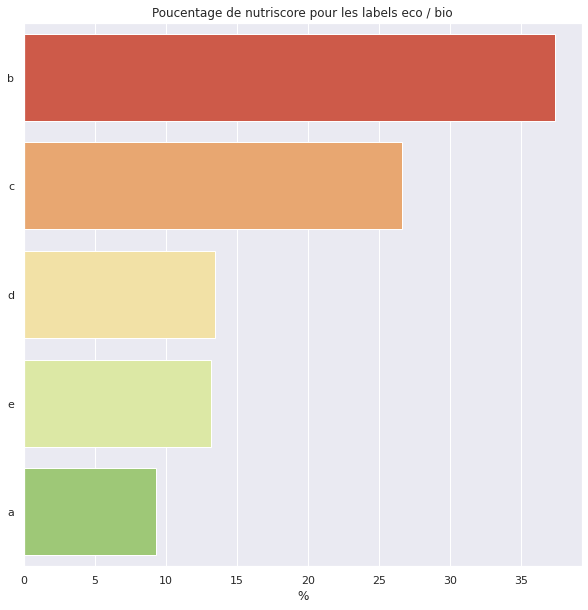

In [6]:
nutri_pc = df_label_ecobio.nutriscore_grade.value_counts() * 100 / df_label_ecobio.nutriscore_grade.count()

sns.barplot(x=nutri_pc, y=nutri_pc.index)
plt.title('Poucentage de nutriscore pour les labels eco / bio')
plt.xlabel('%');

#### Conclusion 

2/3 des produits ont un bon nutriscore (b) et seulement 1/4 ont un mauvais nutriscore (d ou e), il est possible que les labels ont une influence sur le nutriscore

### Les variables nutriscore_grade et labels_en sont-elles indépandantes ?

La seconde relation que nous souhaitons analyser **nutriscore_grade** - **labels_en**:
- Deux variables qualitatives nous utiliserons Chi-2

H0: Le **nutriscore_grade** est indépandant du **labels_en**

In [7]:
df_nutri_label = data[(data["nutriscore_grade"].str.contains("#")==False) & 
                   (data["labels_en"].str.contains("#")==False)]

In [8]:
df_nutri_label.labels_en.value_counts().head(15)

Organic                                         2935
Green Dot                                        535
No preservatives                                 534
No added sugar                                   483
Organic,EU Organic,AB Agriculture Biologique     464
Gluten-free                                      444
Made in France                                   359
Vegetarian,Vegan                                 344
No lactose                                       319
FSC                                              257
No colorings,No preservatives                    247
No colorings                                     198
Sustainable farming,UTZ Certified                178
No gluten                                        149
Organic,EU Organic,FR-BIO-01                     130
Name: labels_en, dtype: int64

In [9]:
df_nutri_label = df_nutri_label[df_nutri_label['labels_en'].map(df_nutri_label['labels_en'].value_counts()) > 129]

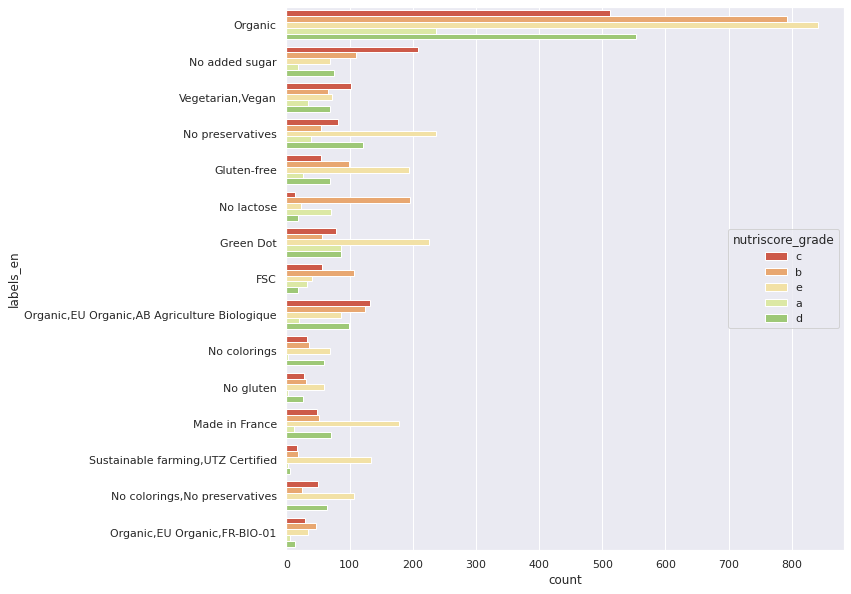

In [10]:
sns.countplot(y='labels_en', hue='nutriscore_grade', data=df_nutri_label)
plt.show()

Nous pouvons conclure graphiquement que certains label comme:
- 'No lactose'
- 'Sustainable farming'
influence grandement le nutriscore.


Cependant d'autre label comme 'Organic' n'influence pas le nutriscore.
Un test statistique du Chi-2 devrait nous aider à repondre à notre question.

#### Tableau de contingence

In [79]:
crosstab = pd.crosstab(df_nutri_label["labels_en"], 
                       df_nutri_label["nutriscore_grade"])

crosstab

nutriscore_grade,a,b,c,d,e
labels_en,,,,,
FSC,33,107,57,19,41
Gluten-free,27,99,55,69,194
Green Dot,86,57,79,87,226
Made in France,12,51,48,70,178
No added sugar,19,111,208,76,69
No colorings,2,36,32,59,69
"No colorings,No preservatives",0,25,50,65,107
No gluten,3,31,28,27,60
No lactose,70,195,13,18,23


In [80]:
c, p, dof, expected = chi2_contingency(crosstab)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 3.202133703084212e-249
Dependent (reject H0)


#### Conclusion 

p correspond à la probabilité de voir l'effet apparent si l'hypothèse H0 est vraie. 

Si la valeur p est inférieure ou égale à un seuil(0,05), nous rejetons l'hypothèse nulle.

Si la valeur p est faible, l'effet est dit statistiquement significatif, ce qui signifie qu'il est peu probable qu'il soit le fruit du hasard. 

Par conséquent, nous pouvons dire que l'effet est plus susceptible d'apparaître dans une population plus large.

**Nous pouvons rejeter l'hypothése H0 : il existe donc une dépendance entre les variables nutriscore_grade et label_en.**

## Relation nutriscore-categorie

### Quelle est la relation entre la catégorie et les nutriments, certaine catégorie de boissons sont-elles plus calorique ou ont un meilleurs nutriscore ?

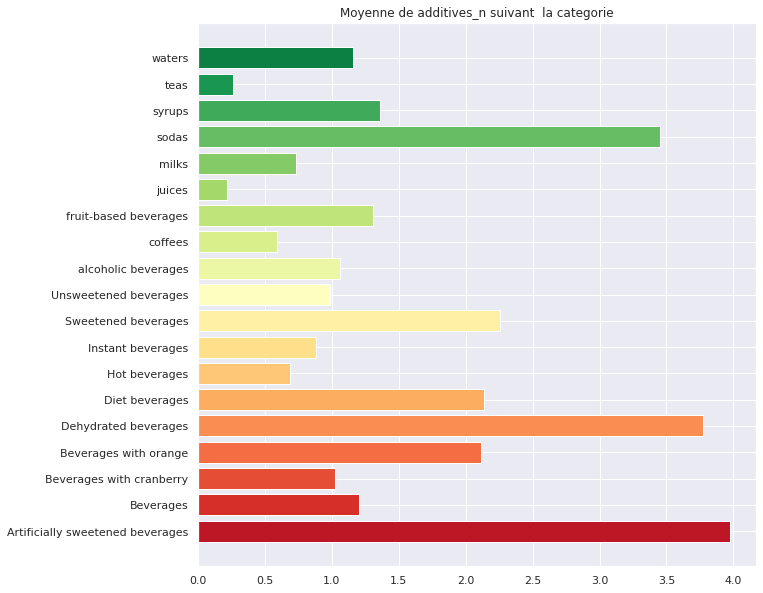

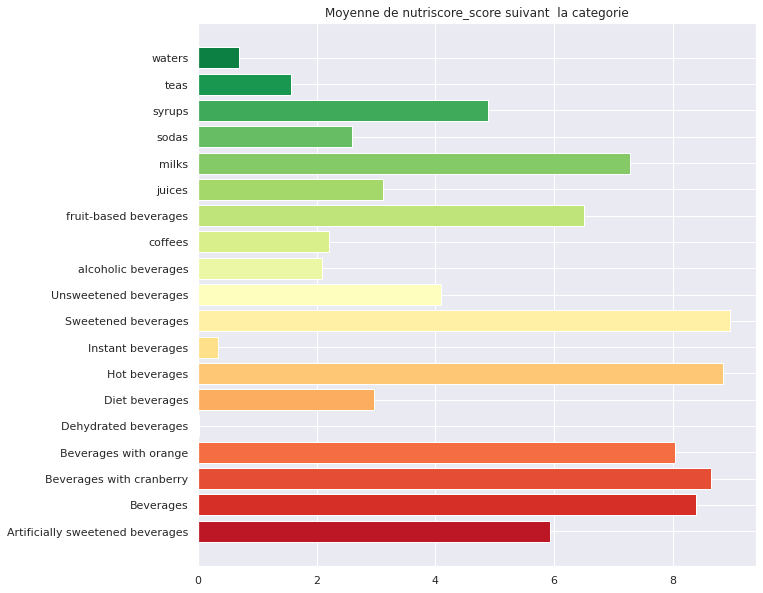

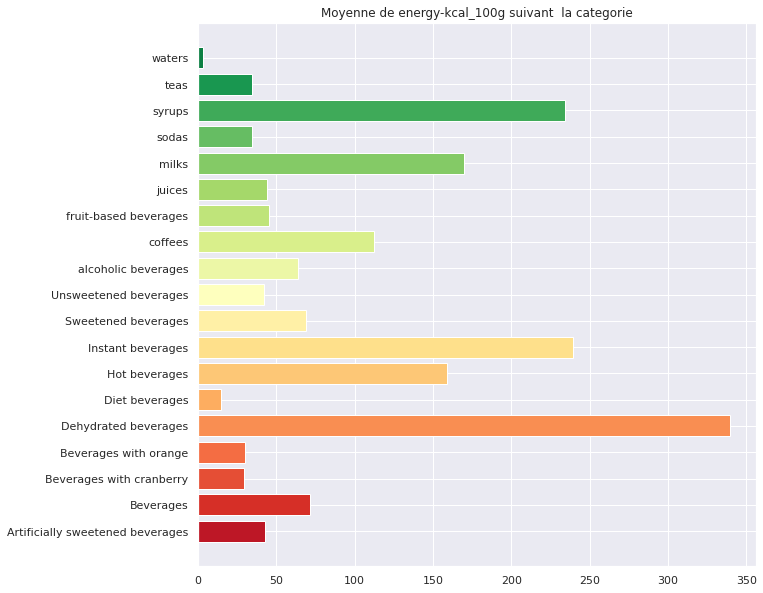

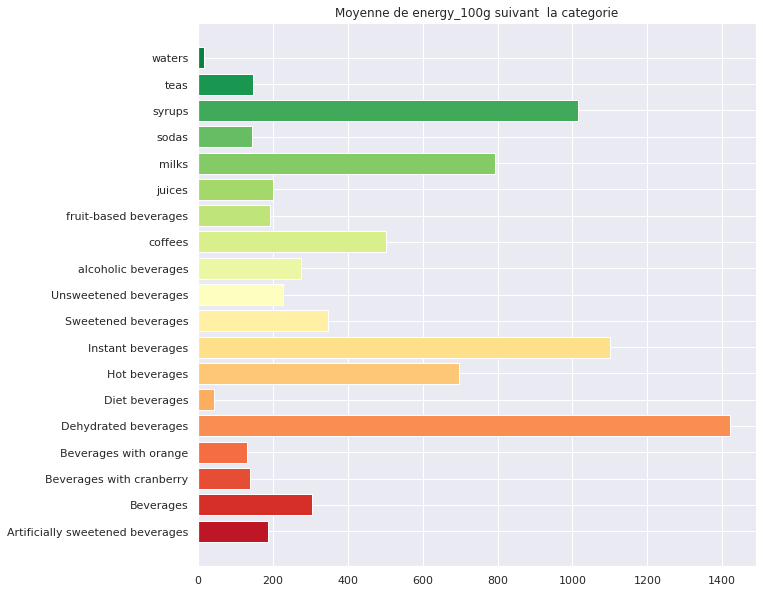

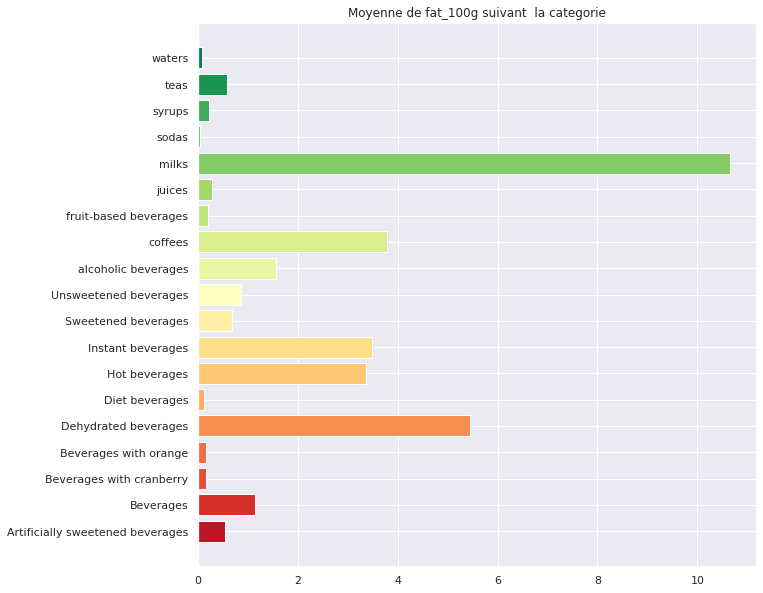

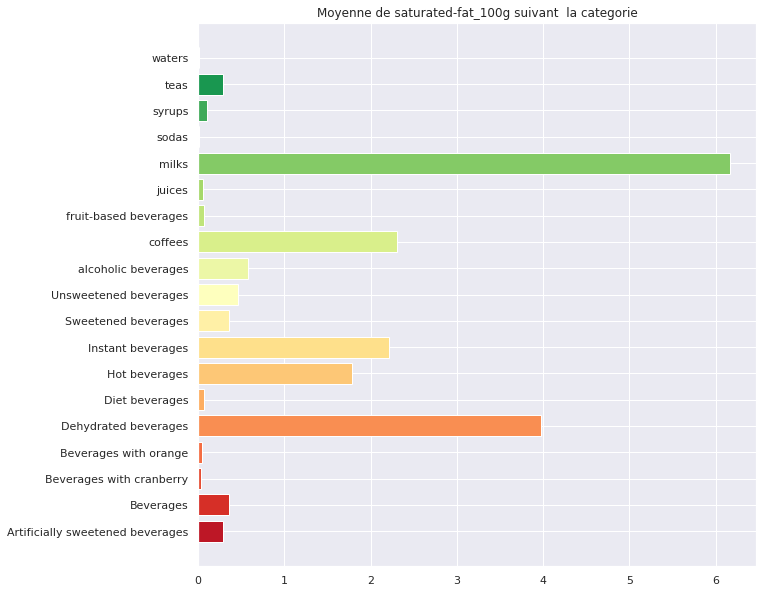

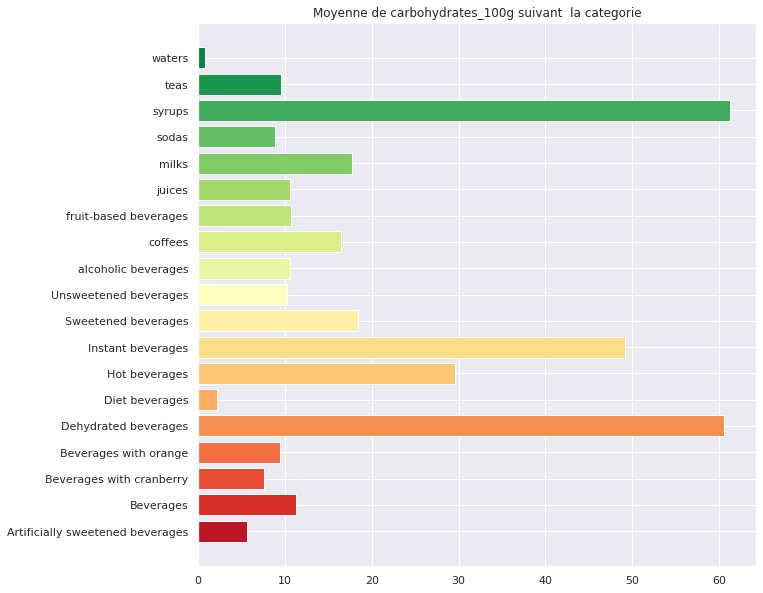

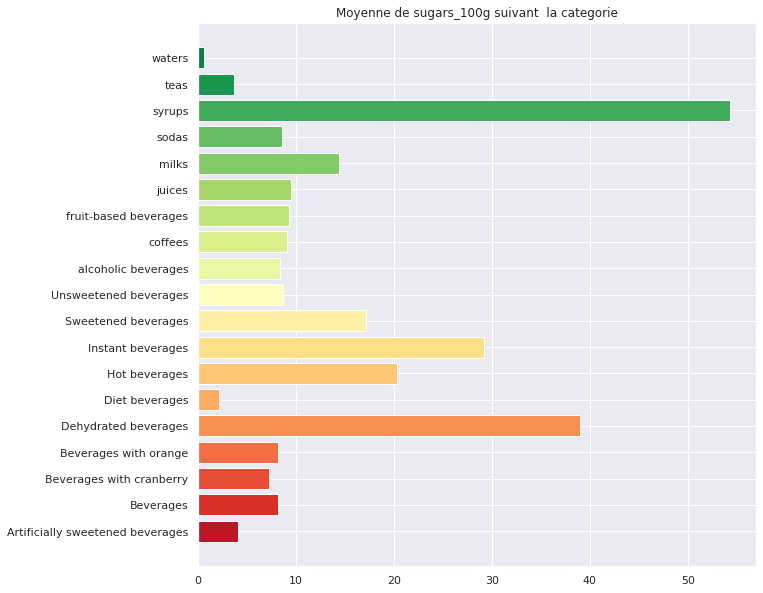

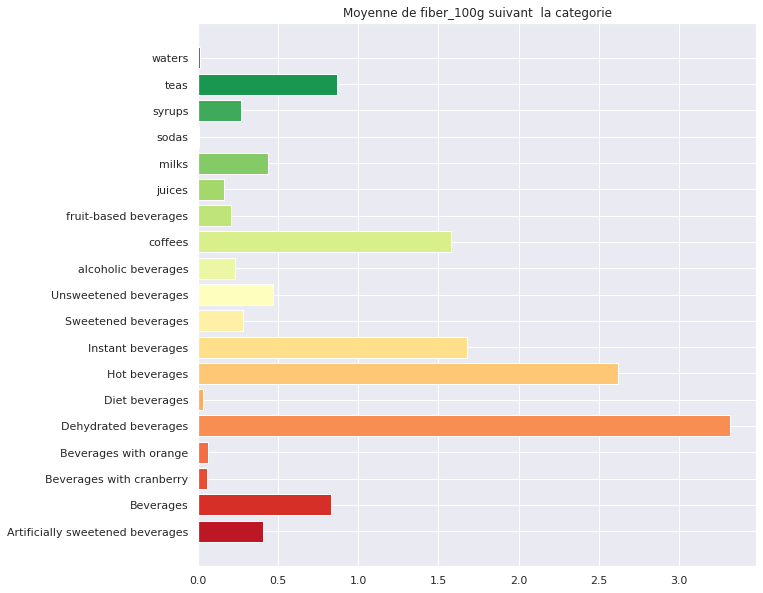

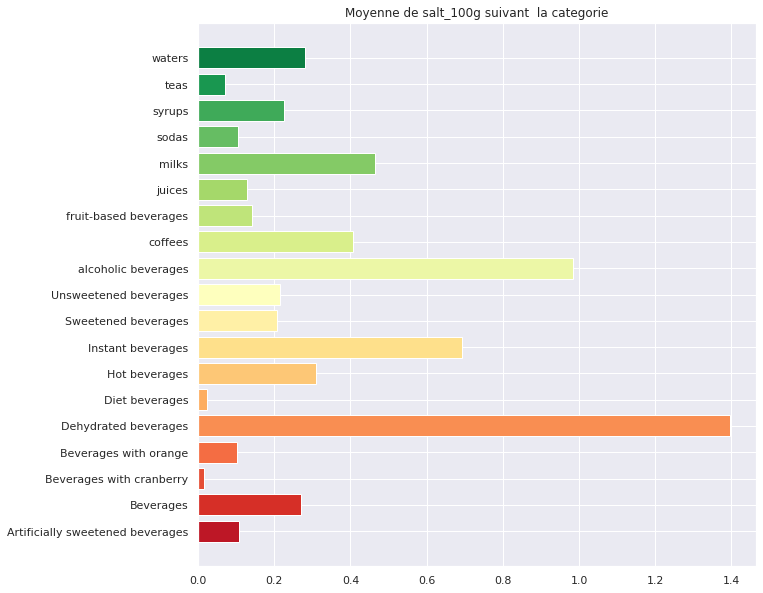

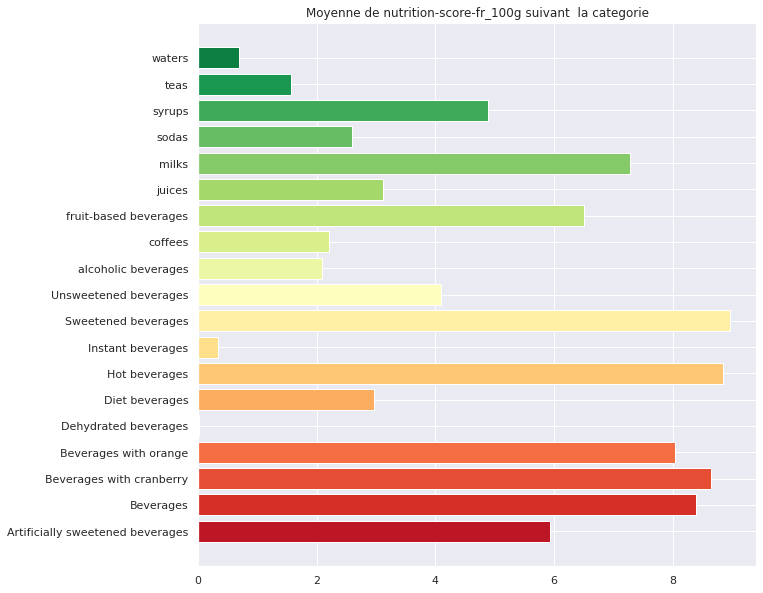

In [95]:
for column in data.select_dtypes(exclude='object'):    
    nutri_grade=data.loc[:,['main_category_en', column]].groupby('main_category_en').agg(['mean', 'count'])
    
    plt.title('Moyenne de '+ str(column)+' suivant  la categorie')
    plt.barh(nutri_grade.index, nutri_grade[column]['mean'], color= sns.color_palette("RdYlGn", 19))
    plt.show()

#### Conclusion

**Additifs**:
- Les sodas, dehydrated beverages et artificially sweetened beverages ont en moyennes plus d'additifs

**Nutriscore**:
- Certaines catégorie ont en effet un bon nutriscore comme le teas et waters cependants nous ne pouvons emettre plus de conclusions graphique


**Nutriments**:
- energy et energy-kcal
    - Les syrups, milks instant beverages et dehydrated beverages sont plus caloriques

- fat/satureted_fat
    - Les boissons qui ont en moyennes le plus de fat sont les milks et dehydrated beverages

    
- carbohydrates/sugars
    - Les boissons qui ont en moyennes le plus de carbohydrates sont les syrups et dehydrated beverages

    
- fiber
    - Les boissons qui ont en moyennes le plus de fiber sont les teas, coffees, hot et dehydrated beverages

- salt
    - Les boissons qui ont en moyennes le plus de salt sont les alcoholic et dehydrated beverages

**Les dehydrated beverages sont des produits très nutritifs en moyenne**

### Quelle est la relation entre la catégorie et le nutriscore ?

La troisième relation que nous souhaitons analyser **nutriscore_grade** - **main_category_en**:
- Deux variables qualitatives nous utiliserons Chi-2

H0: Le **nutriscore_grade** est indépandant du **main_category_en**
    
Cette analyse est importante pour notre application car elle permettra d'avoir une idée de nutriscore en fonction de la catégorie

In [11]:
df_nutri_categ = data[(data["nutriscore_grade"].str.contains("#")==False) & 
                   (data["main_category_en"].str.contains("#")==False)]

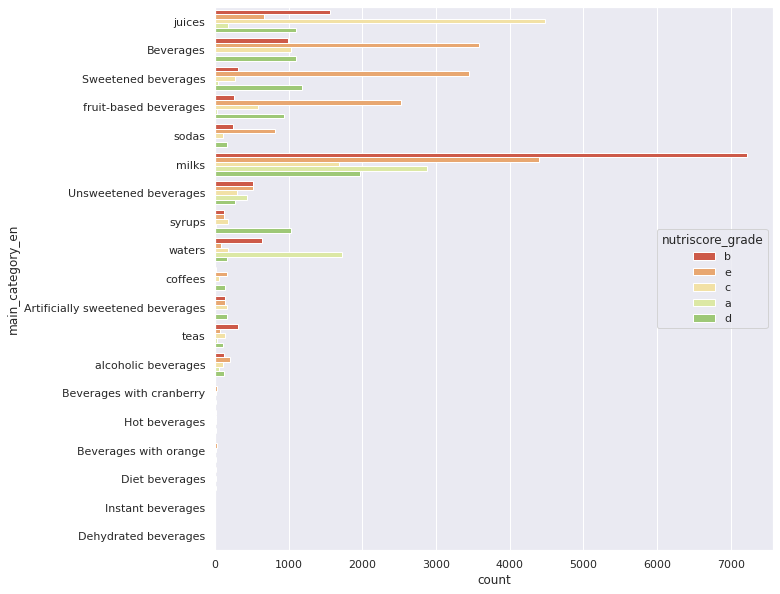

In [13]:
sns.countplot(y='main_category_en', hue='nutriscore_grade', data=df_nutri_categ)
plt.show()

Nous pouvons conclure graphiquement que certaines catégorie comme:
- 'juices'
- 'Sweetened beverages'
- 'Syrups'
- ou encore 'Sodas'
influence grandement le nutriscore.


Cependant d'autre label comme 'Milks' et  'Unsweetened beverages' n'influence pas le nutriscore.
Un test statistique du Chi-2 devrait nous aider à repondre à notre question.

#### Tableau de contingence

In [14]:
crosstab_2 = pd.crosstab(df_nutri_categ["main_category_en"], 
                       df_nutri_categ["nutriscore_grade"])

crosstab_2

nutriscore_grade,a,b,c,d,e
main_category_en,,,,,
Artificially sweetened beverages,1,130,157,161,131
Beverages,0,987,1037,1093,3576
Beverages with cranberry,0,0,14,7,21
Beverages with orange,0,3,8,8,21
Dehydrated beverages,0,0,0,0,1
Diet beverages,1,8,6,9,1
Hot beverages,1,15,7,7,18
Instant beverages,0,1,0,1,3
Sweetened beverages,33,309,271,1174,3444


In [15]:
c, p, dof, expected = chi2_contingency(crosstab_2)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


#### Conclusion 
La p value est bien dessous de alpha pré définie.

**Nous pouvons rejeter l'hypothése H0 : il existe donc une dépendance entre les variables nutriscore_grade et main_category_en.**

## Relation nutriscore-additifs

### Les produits avec plus d'additifs tendent vers un mauvais nutriscore ?

Nous avons vu précédement que les sodas, dehydrated beverages et artificially sweetened beverages ont en moyennes plus d'additifs.

Nous voulons savoir si le nombre additifs entraine un plus mauvais nutriscore

In [112]:
df_add = data[(data["additives_n"]>5) & (data["nutriscore_grade"].str.contains("#")==False)]

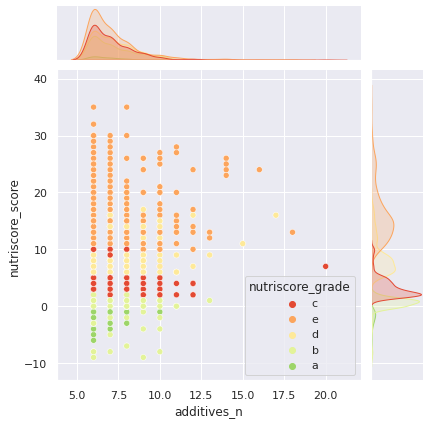

In [126]:
sns.jointplot(x='additives_n', y='nutriscore_score', hue="nutriscore_grade", data=df_add, size=6)
plt.show()

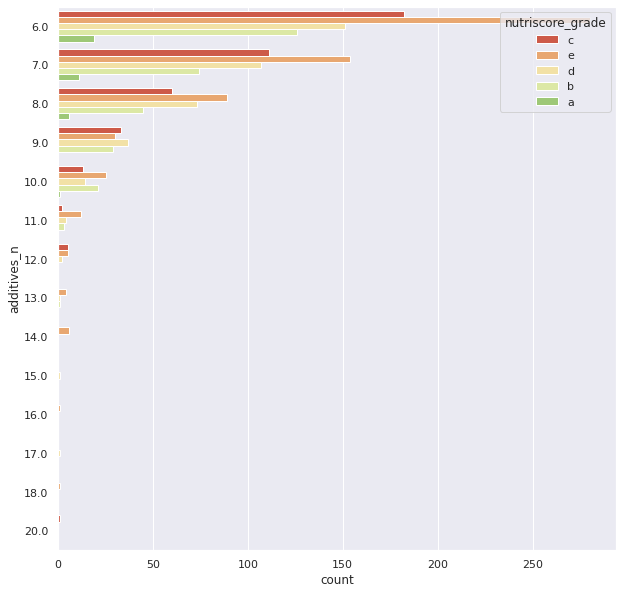

In [113]:
sns.countplot(y='additives_n', hue='nutriscore_grade', data=df_add)
plt.show()

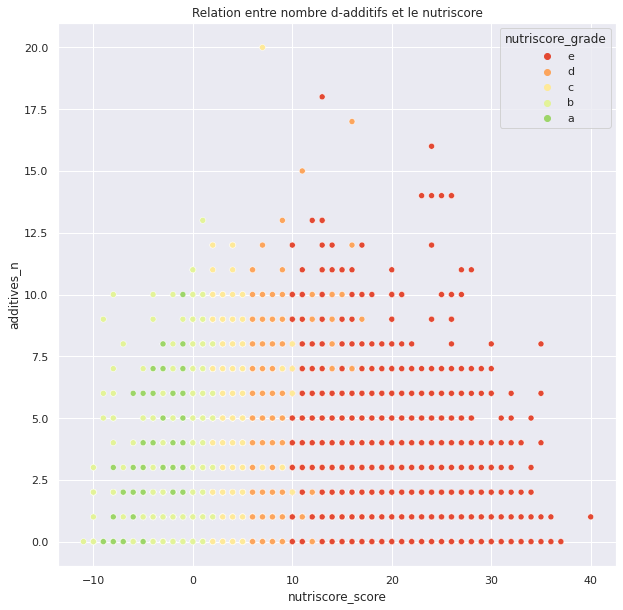

In [9]:
sns.scatterplot(x=df_nutri['nutriscore_score'], 
                y=df_nutri['additives_n'], 
                hue=df_nutri['nutriscore_grade'],
                hue_order=['e','d','c','b','a'],
                legend='full') 
plt.title('Relation entre nombre d-additifs et le nutriscore')
plt.show()

#### Conclusion

Les produits Avec 6 ou 7 additifs ont bien un nutriscore de c,d et e plus conscequent, cependant, nous ne pouvons pas conclure que le nombre d'additifs influe dans un sens le nutriscore.

Il faut pour cela analysé la qualité des différents additifs. En effet, un mauvais additifs pourrait influencé grandement le nutriscore, lorsque 4 additifs 'neutre' n'auraint pas d'influence.

### Relation nutriscore-nutriments

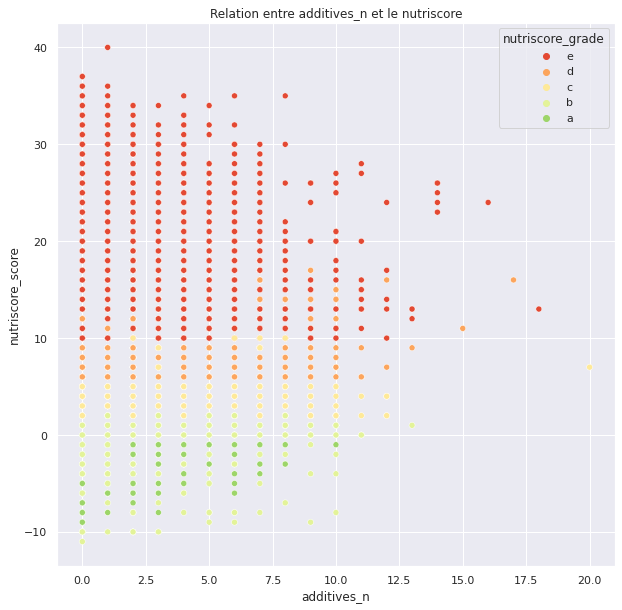

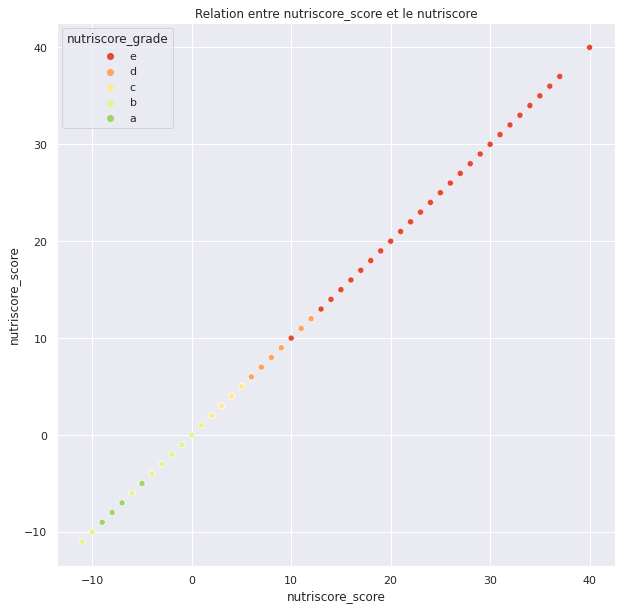

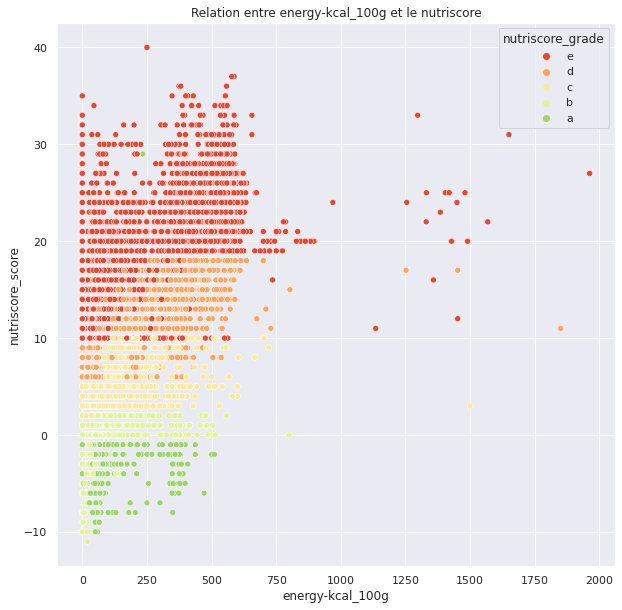

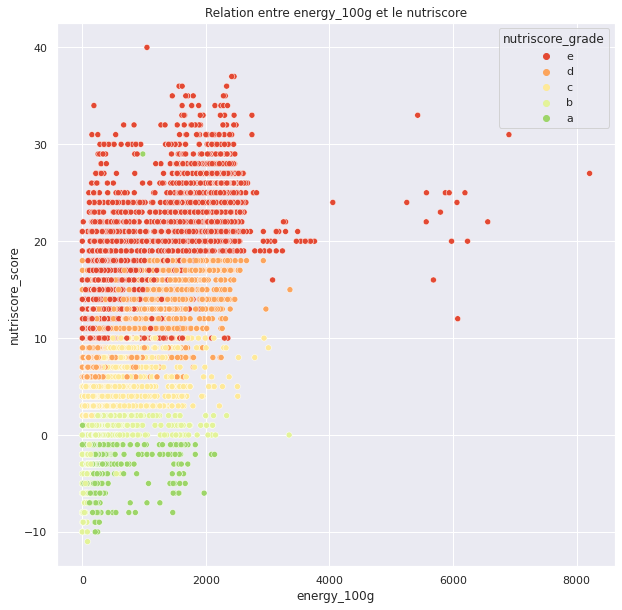

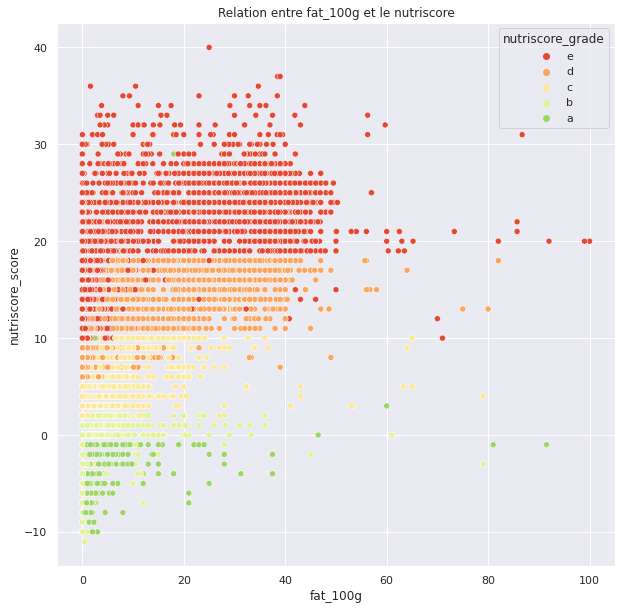

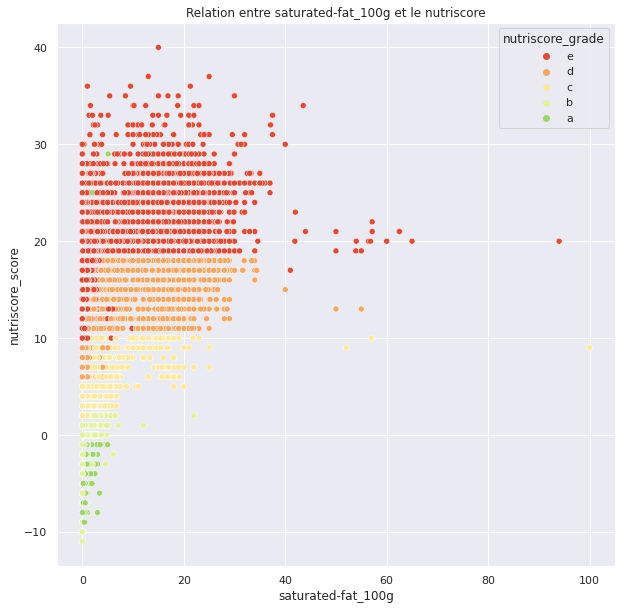

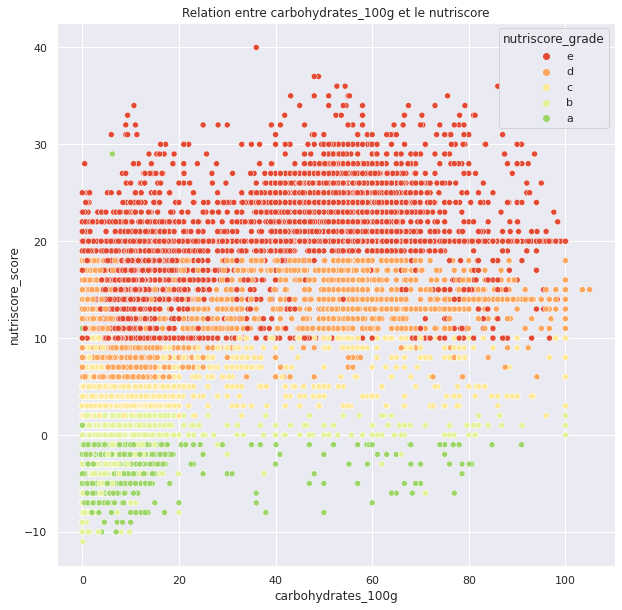

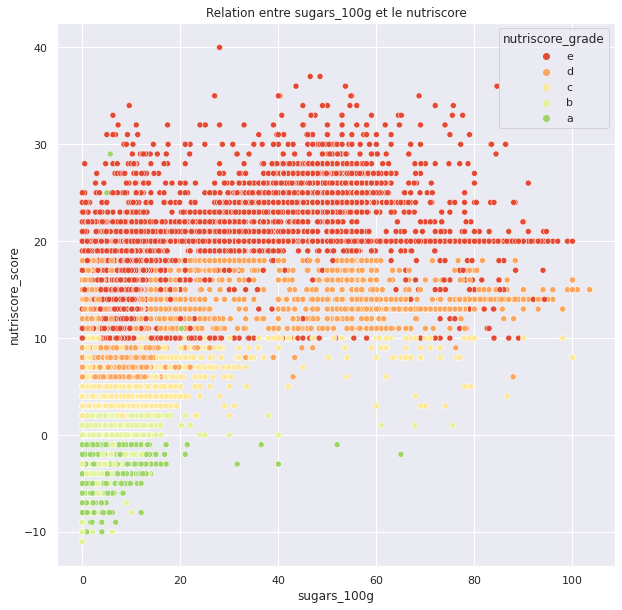

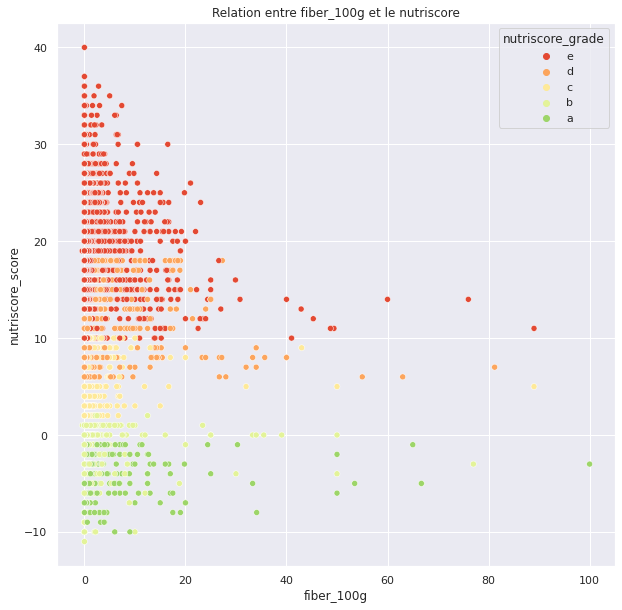

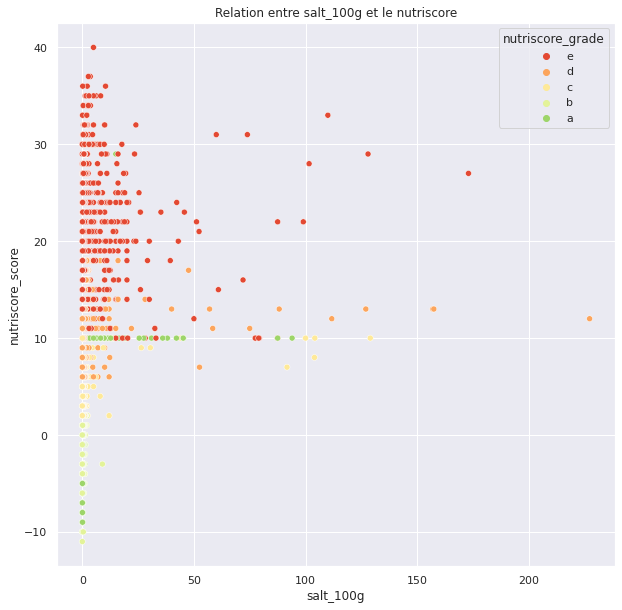

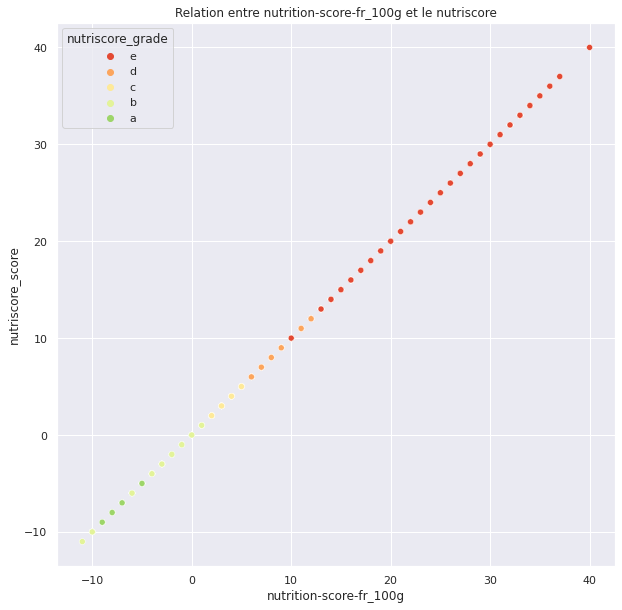

In [11]:
for column in df_nutri.select_dtypes(exclude='object'):    
    sns.scatterplot(x=df_nutri[column], 
                    y=df_nutri['nutriscore_score'], 
                    hue=df_nutri['nutriscore_grade'],
                    hue_order=['e','d','c','b','a'],
                    legend='full') 
    plt.title('Relation entre '+ str(column)+' et le nutriscore')
    plt.show()

#### Conclusion

**Rappel: due à l'imputation de valeur lors du prétraitement des données celles-ci sont légérement biaisé**

- additives_n: voir précédemment

- energy-kcal_100g et energy_100g: Les produits ayant un fort taux calorique ont un mauvais nutriscore cependant certains produit peu calorique ont également un mauvais nutriscore.

- fat_100g: Les produits ayant un fort taux de fat ont un mauvais nutriscore cependant certains produit avec peu de fat ont également un mauvais nutriscore.

- saturated-fat_100g: On constate que les produit avec peu de saturated-fat ont un bon nutriscore

- carbohydrates_100g: Les produits ayant un fort taux de carbohydrates ont un mauvais nutriscore cependant certains produit avec peu de carbohydrates ont également un mauvais nutriscore.

- sugars_100g & fiber_100g & salt_100g:

**de manière générale la conclusion est la même les produits peu nutrtitifs ont tendance à être aussi bien bon comme mauvais en terme de nutriscore**


## Matrice des corrélation

**L'objectif est de vérifier la correlation entre la target et les variables utilisé pour le calcul du nutri-score de notre application, afin de répondre à notre précédente question: Quelle est la relation entre les nutriments et le nutriscore.**

Si la corrélation n'est pas confirmé alors notre calcul du nutriscore aura une une plus grande précision en utilisant ces variables ?

<AxesSubplot:>

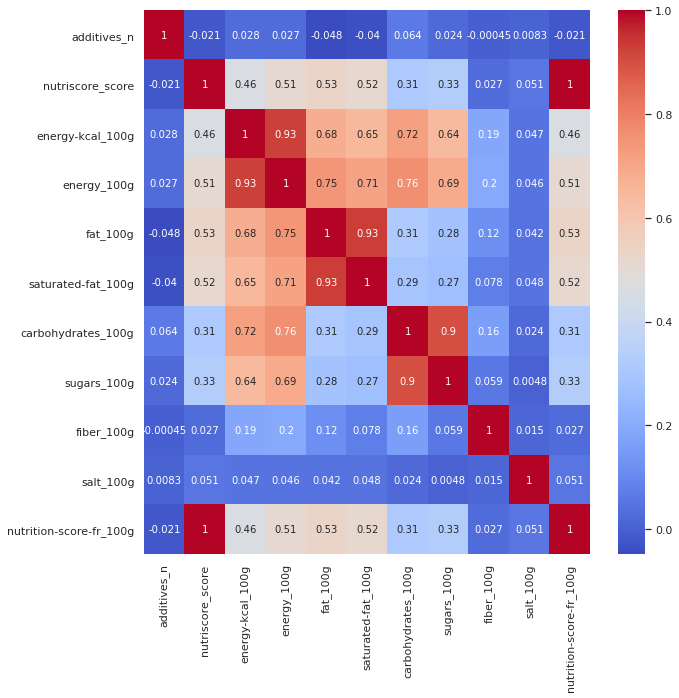

In [20]:
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

### Conclusions

**Nutriscore**:
- Comme vu précdement dans un graphique le nutriscore est totalement corrélé au nutriscore_fr
- Les variables fat/satureted_fat et energy sont moyennement corrélé au nutriscore

**Additifs**:
- Le nombre d'additifs est très peu corrèlé à nos différents variable, **on peut donc infirmer l'utilisation de cette variable pour calcul du nutriscore actuel**

**Nutriments**:
- energy et energy-kcal
    - ces deux variable sont fortement corrélées entre elles
    - ces deux variables ont un corrélation moyenne avec fat/satureted_fat, sugars et carbohydrates
    - ces deux variables ont une corrélation faible avec le nutriscore

- fat/satureted_fat
    - correlation forte: un produit avec une forte présence de fat aura également une forte présence de satureted_fat

    
- carbohydrates/sugars
    - correlation forte: un produit avec une forte présence de carbohydrates aura également une forte présence de sugars
    
- fiber
    - correlation quasiment nulle avec les autres variables
        **on peut donc infirmer l'utilisation de cette variable pour calcul du nutriscore actuel**
    
- salt
    - correlation quasiment nulle avec les autres variables
        **on peut donc infirmer l'utilisation de cette variable pour calcul du nutriscore actuel**


Notre matrice de corrélation permet de nous indiqué que les variables fiber/salt et Additifs(nombre) ne sont pas corrélé avec le nutriscore, elle ne sont donc prise en compte dans le calcul du nutriscore actuel.

# Analyse multivariée

Voir prochain notebook

------------------------------------------------------------------------------------------------------------------